In [29]:
# === Imports ===
import pandas as pd
import plotly.graph_objects as go
import psycopg2
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
from pathlib import Path

In [30]:
# === Visualization settings ===
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [31]:
# === Load environment variables ===
env_path = Path("secrects.env")
load_dotenv(dotenv_path=env_path)

True

In [32]:
# === Connect to PostgreSQL ===
conn = psycopg2.connect(
    host=os.getenv("DB_HOST"),
    dbname=os.getenv("DB_NAME"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASS")
)
cursor = conn.cursor()
print("✅ Connected to database.")

✅ Connected to database.


In [33]:
query = """
    SELECT
        c.description AS Airline,
        ROUND(AVG(f.depdelay), 2) as Avg_Departure_Delay
    FROM
        carriers c
    JOIN
        flights_2007 f ON f.UniqueCarrier = c.code
    WHERE
        f.cancelled = 0 AND f.DepDelay IS NOT NULL
    GROUP BY
        c.description
    ORDER BY
        Avg_Departure_Delay DESC
    LIMIT 10;
    """

df_delays = pd.read_sql_query(query, conn)
df_delays.head()

C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\2480806802.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_delays = pd.read_sql_query(query, conn)


,airline,avg_departure_delay
0,Atlantic Southeast Airlines,20.22
1,JetBlue Airways,14.74
2,American Airlines Inc.,14.72
3,United Air Lines Inc.,13.91
4,American Eagle Airlines Inc.,13.19


C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\1712144876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_delays, x="avg_departure_delay", y="airline", palette="magma")


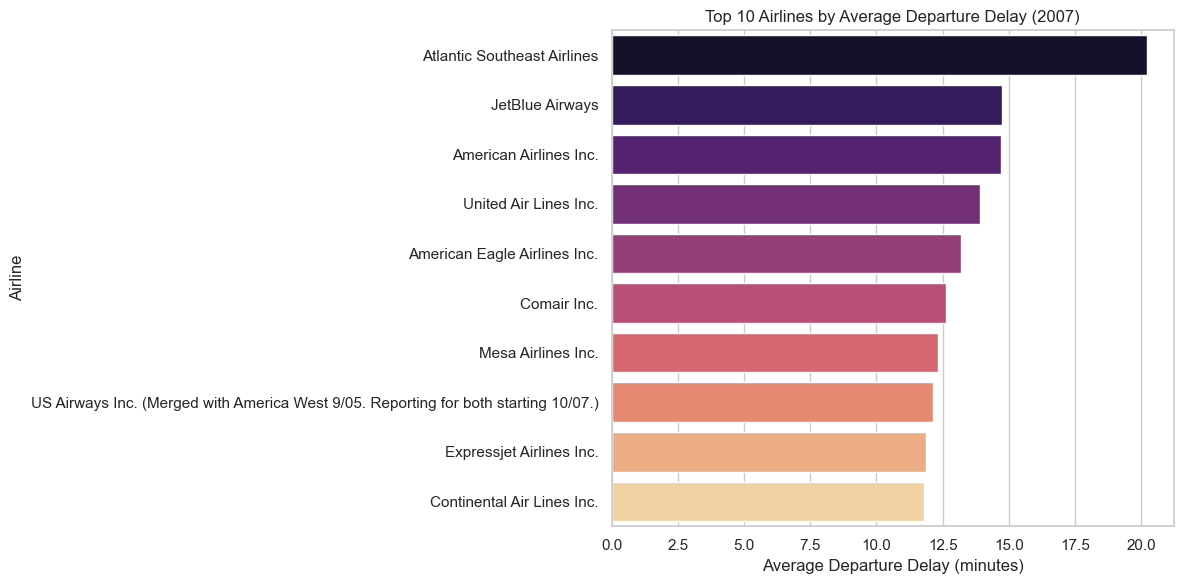

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=df_delays, x="avg_departure_delay", y="airline", palette="magma")
plt.title("Top 10 Airlines by Average Departure Delay (2007)")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


## ✈️ Interpretation

This chart shows the 10 airlines with the highest average departure delays in 2008.
Large delays may indicate systemic operational issues or specific external factors
such as airport congestion or weather patterns.

Airlines at the top of the list may require further investigation to understand the reasons behind consistent delays.

In [35]:
query2 = """
    SELECT
	    dayofweek,
	    ROUND(AVG(depdelay), 2) AS avg_dep_delay
    FROM
	    flights_2007
    GROUP BY
	    dayofweek
    ORDER BY
	    dayofweek
"""

In [36]:
df_by_day = pd.read_sql_query(query2, conn)
day_labels = {
    1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday", 7: "Sunday"
}

C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\1894910313.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_by_day = pd.read_sql_query(query2, conn)


In [37]:
df_by_day["dayofweek"] = df_by_day["dayofweek"].map(day_labels)
df_by_day.head()

,dayofweek,avg_dep_delay
0,Monday,11.65
1,Tuesday,9.18
2,Wednesday,10.43
3,Thursday,12.59
4,Friday,13.28


C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\3890554858.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_by_day, x="dayofweek", y="avg_dep_delay", palette="Blues_d")


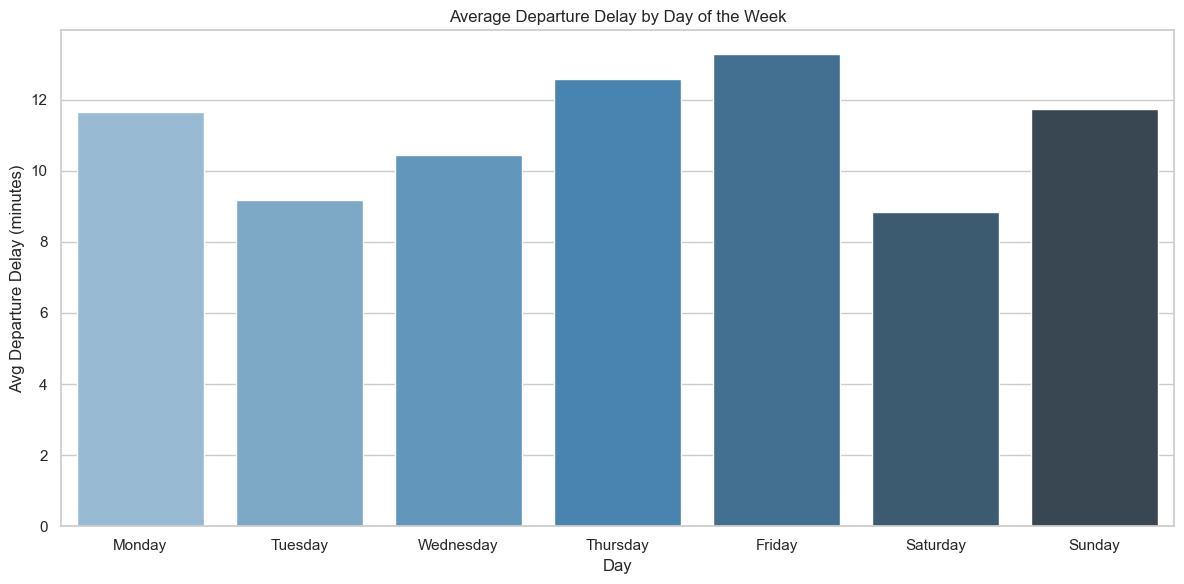

In [38]:
sns.barplot(data=df_by_day, x="dayofweek", y="avg_dep_delay", palette="Blues_d")
plt.title("Average Departure Delay by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Avg Departure Delay (minutes)")
plt.tight_layout()
plt.show()

## 📅 Interpretation

This chart shows how average departure delays vary across the days of the week.
Fridays and Mondays might show higher delays due to business travel peaks, while weekends tend to be smoother.

In [39]:
query3 = """
SELECT
    month,
    SUM(carrierdelay) AS Company,
    SUM(weatherdelay) AS Weather,
    SUM(nasdelay) AS NAS,
    SUM(securitydelay) AS Security,
    SUM(lateaircraftdelay) AS AirCraft
FROM
    flights_2007
WHERE
	cancelled = 0
GROUP BY
    month
ORDER BY
    month
"""

df_delays_by_month = pd.read_sql_query(query3, conn)
df_delays_by_month

C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\775504293.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_delays_by_month = pd.read_sql_query(query3, conn)


,month,company,weather,nas,security,aircraft
0,1,2200212.0,505125.0,2234312.0,12124.0,2904995.0
1,2,2618501.0,646296.0,2208587.0,14144.0,3395999.0
2,3,2548581.0,404860.0,2304310.0,13737.0,3321925.0
3,4,2078632.0,317424.0,2205125.0,14453.0,2826618.0
4,5,1919316.0,382267.0,2063976.0,11686.0,2487334.0
5,6,2992281.0,803209.0,3244260.0,20560.0,4370859.0
6,7,3008057.0,698240.0,2811468.0,23045.0,4275001.0
7,8,2866013.0,547181.0,2701698.0,17971.0,3933045.0
8,9,1748246.0,246889.0,1495285.0,11244.0,1792796.0
9,10,1908292.0,287745.0,2127859.0,11612.0,2338823.0


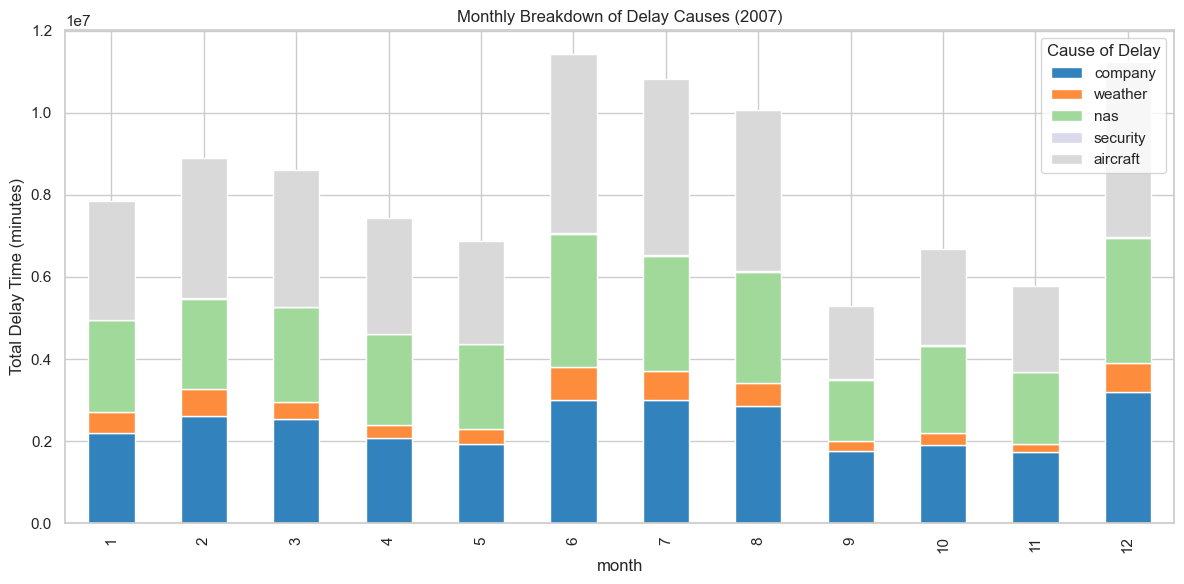

In [40]:
df_delays_by_month.set_index("month", inplace=True)

df_delays_by_month.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="tab20c"
)

plt.title("Monthly Breakdown of Delay Causes (2007)")
plt.xlabel("month")
plt.ylabel("Total Delay Time (minutes)")
plt.legend(title="Cause of Delay")
plt.tight_layout()
plt.show()


## 🧠 Interpretation

This stacked bar chart shows how different delay causes varied month by month in 2008.

We can observe peaks in carrier-related delays during busy travel months, and weather-related delays during winter months (like January and December).

Late aircraft delays tend to be consistently high, reflecting the cascading nature of flight schedules.

In [41]:
query4 = """
    SELECT
        distance,
        ArrDelay
    FROM 
        flights_2007
    WHERE
        cancelled = 0
        AND arrdelay IS NOT NULL
        AND distance IS NOT NULL
        AND distance > 0
        AND  arrdelay BETWEEN -60 AND 300
    LIMIT 10000;
"""

df = pd.read_sql_query(query4, conn)

C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\1796132864.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query4, conn)


In [42]:
# Create distance buckets
bins = [0, 250, 500, 750, 1000, 1250, 1500, 2000, 2500]
labels = [
    "0–250 mi", "251–500 mi", "501–750 mi", "751–1000 mi",
    "1001–1250 mi", "1251–1500 mi", "1501–2000 mi", "2001–2500 mi"
]
df["distancerange"] = pd.cut(df["distance"], bins=bins, labels=labels)

C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\1146892429.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = df.groupby("distancerange")["arrdelay"].mean().reset_index()
C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\1146892429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delay, x="distancerange", y="arrdelay", palette="Blues_d")


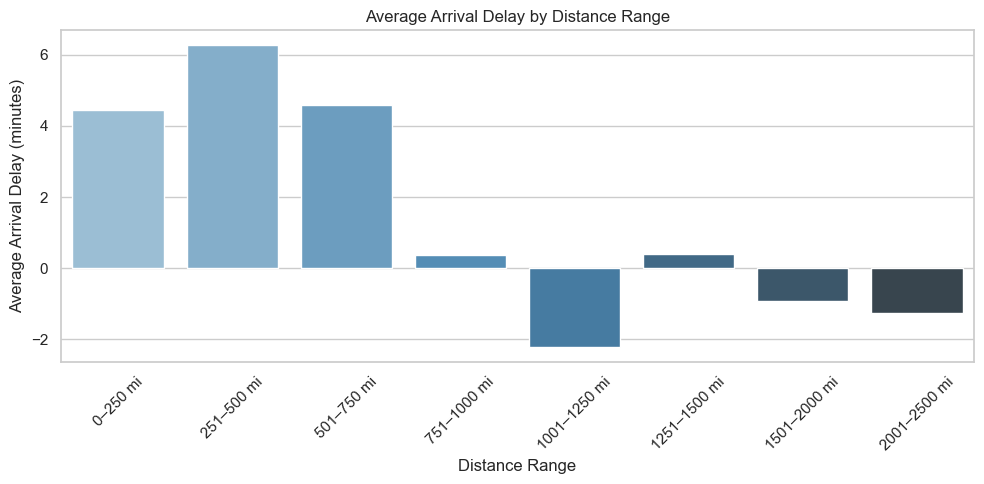

In [43]:
avg_delay = df.groupby("distancerange")["arrdelay"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_delay, x="distancerange", y="arrdelay", palette="Blues_d")

plt.title("Average Arrival Delay by Distance Range")
plt.xlabel("Distance Range")
plt.ylabel("Average Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\123922133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="distancerange", y="arrdelay", palette="Set2")


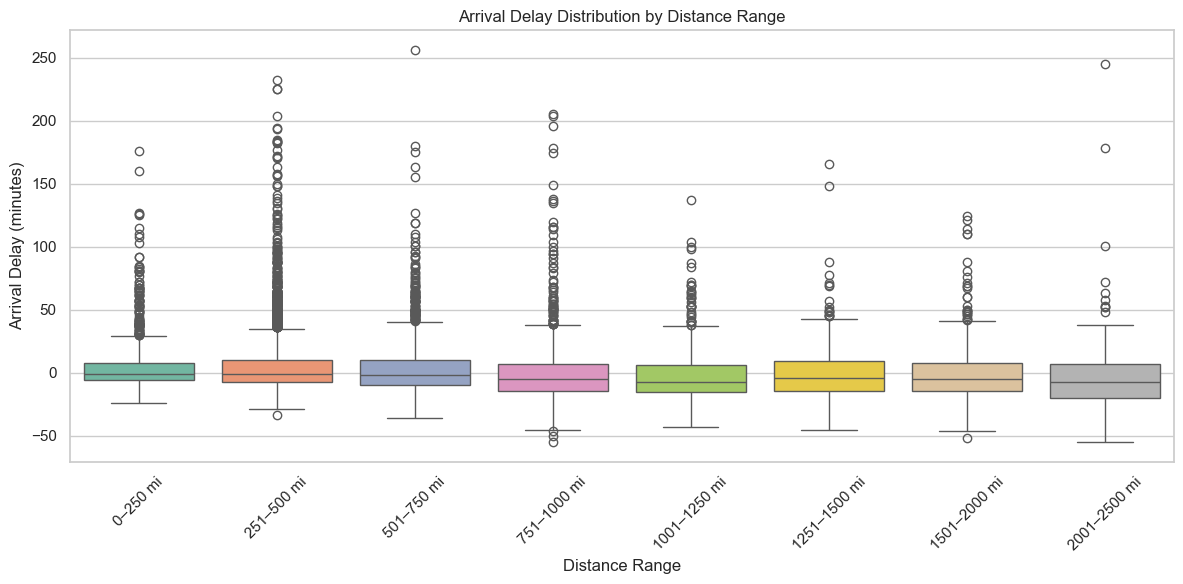

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="distancerange", y="arrdelay", palette="Set2")

plt.title("Arrival Delay Distribution by Distance Range")
plt.xlabel("Distance Range")
plt.ylabel("Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🔍 Interpretation

The boxplot and average delay analysis clearly demonstrate that:

- **Shorter flights (0–750 mi)** have the **highest average delays** and **most variance**
- **Long-haul flights (1500+ mi)** are **more consistent** and tend to have **lower average delays**
- The distribution narrows as distance increases, confirming that long flights may benefit from **better planning buffers** and **priority handling**

This strengthens the conclusion that **flight distance alone doesn't predict delay**, but **shorter routes may suffer more from operational bottlenecks and tight schedules**.

In [45]:
query5 = """
    SELECT 
    p.manufacturer,
    2008 - p.year AS aircraft_age,
    f.arrdelay
FROM flights_2008 f
JOIN plane_data p ON f.tailnum = p.tailnum
WHERE 
    f.arrdelay IS NOT NULL
    AND f.cancelled = 0
    AND p.year IS NOT NULL
    AND p.year > 1950
    AND p.manufacturer IS NOT NULL;
"""
df = pd.read_sql_query(query5, conn)

C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\2887180503.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query5, conn)


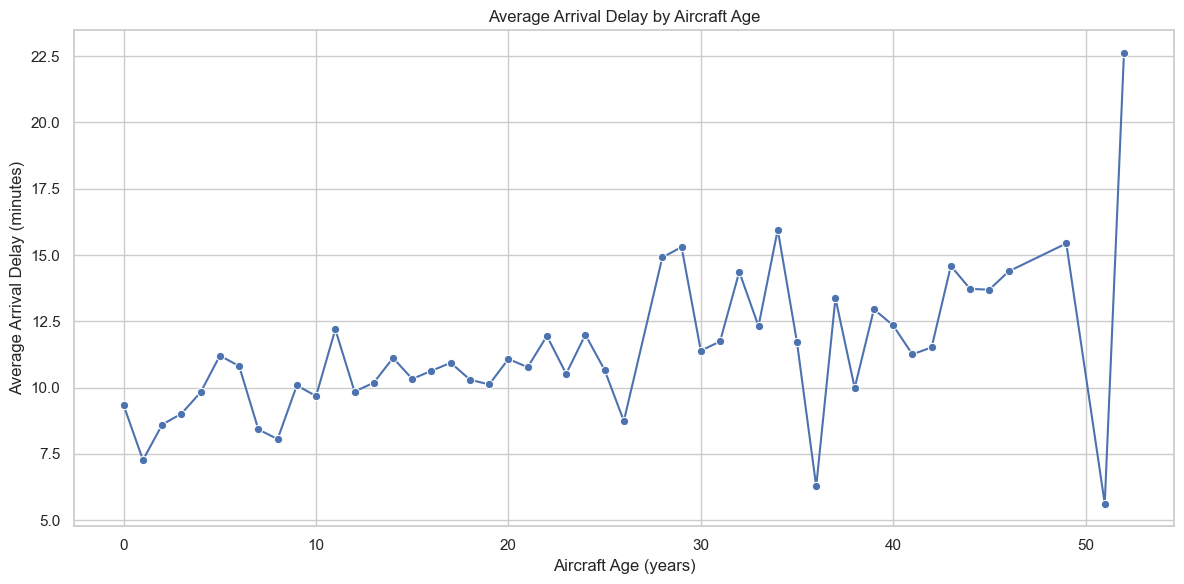

In [46]:
age_delay = df.groupby("aircraft_age")["arrdelay"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=age_delay, x="aircraft_age", y="arrdelay", marker="o")

plt.title("Average Arrival Delay by Aircraft Age")
plt.xlabel("Aircraft Age (years)")
plt.ylabel("Average Arrival Delay (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\149812394.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=manufacturer_delay, x="arrdelay", y="manufacturer", palette="viridis")


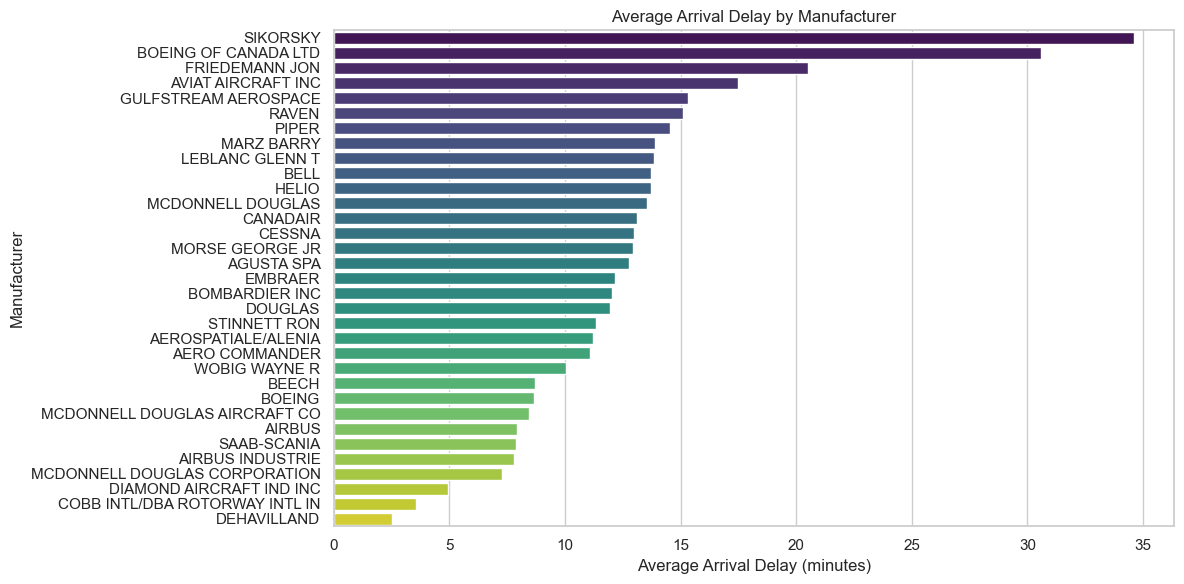

In [47]:
manufacturer_delay = (
    df.groupby("manufacturer")["arrdelay"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=manufacturer_delay, x="arrdelay", y="manufacturer", palette="viridis")

plt.title("Average Arrival Delay by Manufacturer")
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()


### ✈️ Final Insights

- Older aircraft tend to have **slightly higher average delays**.
- Certain manufacturers are associated with **younger fleets** and thus **lower average delays**.
- NaN manufacturers and missing years were removed to ensure data integrity.
- These results support that **both aircraft age and manufacturer are relevant operational factors** in flight performance.

In [48]:
query6 = """
SELECT crsdeptime, depdelay
FROM flights_2008
WHERE cancelled = 0 AND crsdeptime IS NOT NULL AND depdelay IS NOT NULL;
"""
df = pd.read_sql_query(query6, conn)

C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\695831806.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query6, conn)


C:\Users\lucas\AppData\Local\Temp\ipykernel_10484\1140911833.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query6, conn)


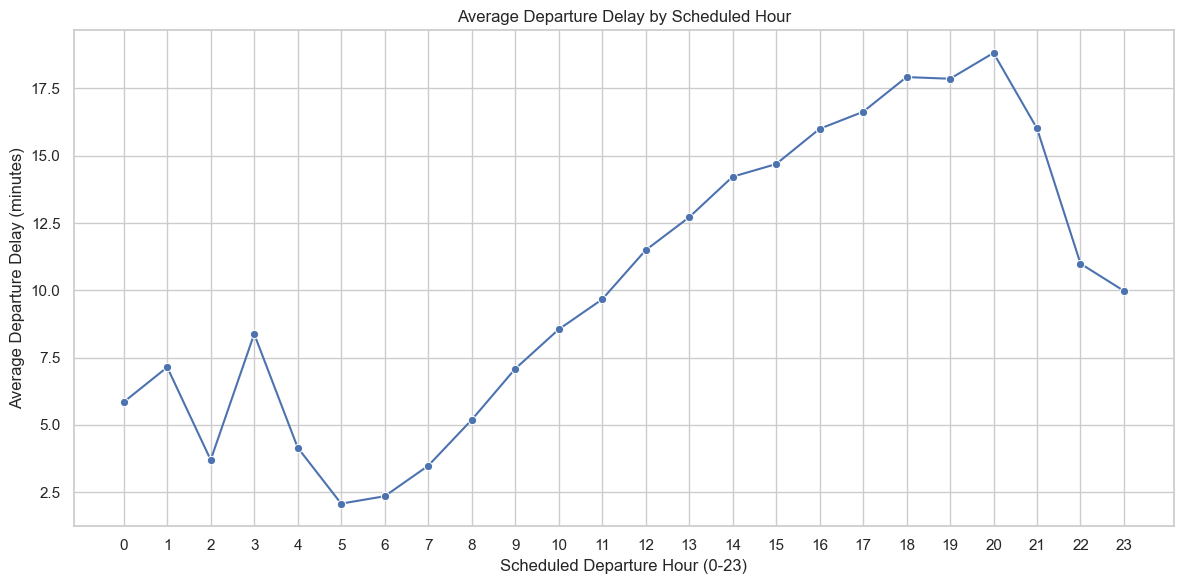

In [49]:
df = pd.read_sql_query(query6, conn)

# === Extract hour from scheduled departure time ===
# Note: crsdeptime is usually in hhmm format, e.g., 1530 → 15:30
df["dep_hour"] = df["crsdeptime"] // 100  # get hour part

# === Group by hour and calculate average delay ===
avg_delay_by_hour = df.groupby("dep_hour")["depdelay"].mean().reset_index()

# === Plot ===
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_delay_by_hour, x="dep_hour", y="depdelay", marker="o")
plt.title("Average Departure Delay by Scheduled Hour")
plt.xlabel("Scheduled Departure Hour (0-23)")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

### 🕒 Analysis: Average Departure Delay by Scheduled Hour

This analysis reveals a clear pattern in how departure delays evolve throughout the day.

Flights scheduled in the early morning hours (from midnight to 7 AM) tend to experience the lowest average delays — often below 5 minutes. This is likely due to lower traffic volumes and the fact that aircraft and crew are already stationed at the departure airport, ready to begin operations.

From 9 AM onward, we observe a steady increase in average departure delays. This trend continues until it peaks between **5 PM and 8 PM**, where average delays reach **over 18 minutes**. This afternoon peak reflects the cumulative effect of delays building up throughout the day, as well as increased air traffic and possible weather-related disruptions.

After 9 PM, the average delay starts to decrease again, following the reduction in air traffic.

**Conclusion:**  
Delays are strongly influenced by the time of day. Passengers aiming for more punctual departures may benefit from booking flights earlier in the day, while airlines could use this pattern to optimize scheduling and resource allocation.
